# The SIR Model

The SIR (Susceptible-Infected-Recovered) model is a simple system of ODEs used to model the spread of an epidemic. An excellent article documenting this model can be found on the MAA website here:


https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model

---

The model is a system of three ODEs, modeling the fraction of the population that is susceptible to a disease at time $t$ ($s(t)$), an infectious carrier of a disease at time $t$ ($i(t)$), and recovered from (or removed by) the disease at time $t$ ($r(t)$). The system is given below:

$\qquad\dfrac{ds}{dt} = -bs(t)i(t),$

$\qquad\dfrac{di}{dt} = b s(t) i(t) - k i(t),$

$\qquad\dfrac{dr}{dt} = k i(t)$

The initial conditions are: $\quad s(0) = s_0,\qquad i(0) = i_0, \qquad r(0) = 0$

The parameters of the system are:

* $b$: average number of population members infected by an infected individual per unit time

* $k$: fraction of the infected group that can recover in a given day

Sometimes, $b$ can be parameterized as a "forcing" term $b(t)$, as the number of population members infected per carrier per unit time may change depending on external factors.

---

We also note that the unitless quantity $\mathcal{R}_0 = b/k$ is referred to as the *basic reproductive number*, and is commonly used an estimate of the expected number of secondary cases that arise from a single infectious case. This value can be interpreted as follows:

* If $\mathcal{R}_0 > 1$, then each infectious member of the population will spread the disease to more than one individual, resulting in a possible pandemic.


* If $\mathcal{R}_0 = 1$, then each infectious member of the population will spread the disease to one individual, resulting in a steady-state rate of transmission.


* If $\mathcal{R}_0 < 0$, then each infectious member of the population will spread the disease to fewer than one individual, resulting in a local outbreak that probably will not become a pandemic.

In [1]:
# dependencies:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Right hand side of SIR ODE system where
#    y := (s(t), i(t), r(t)),
#    b, k are fixed constants
def SIR_RHS(y, t, b, k):
    ds_dt = -b*y[0]*y[1]
    di_dt = b*y[0]*y[1] - k*y[1]
    dr_dt = k*y[1]
    
    return np.array([ds_dt, di_dt, dr_dt])

# Right hand side of SIR ODE system where
#    y := (s(t), i(t), r(t)),
#    b(t), k(t) are functions of t (passed as lambdas)
def SIR_parameterized_RHS(y, t, b_t, k_t):
    ds_dt = -b_t(t)*y[0]*y[1]
    di_dt = b_t(t)*y[0]*y[1] - k*y[1]
    dr_dt = k_t(t)*y[1]
    
    return np.array([ds_dt, di_dt, dr_dt])


### Example 1

In the example below, we fix $k$ and $b$ as constants. Note that changing the values of $k$ and $b$ and the initial conditions $s_0$ and $i_0$ can change the outcome of a given disease outbreak. That is, depending on the parameters and initial conditions, the system could model a localized outbreak or a population-spanning pandemic.

For example, suppose we cut the infectiousness of the disease in half (e.g. through a quarantining and social distancing). Then we would set ``b = 0.5`` instead of ``b = 1.0``. This has a significant effect on the outcome!

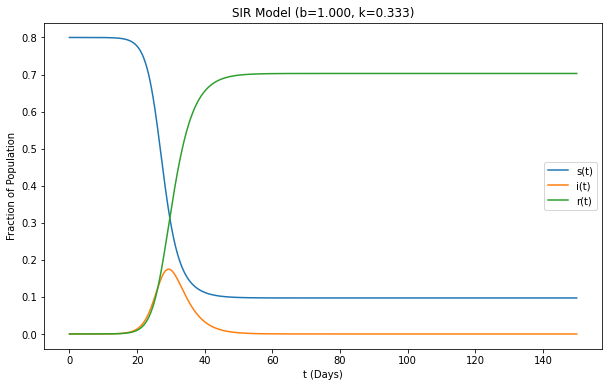

===== Outcome (t_f = 150.0 days) =====
Fraction of uninfected individuals, s(t_f): 0.0971
Fraction of recovered individuals, r(t_f): 0.7029
R_0 value: 3.000


In [2]:
# model parameters:
b = 1.0
k = 1./3.

# initial conditions:
s_0 = 0.8
i_0 = 1.25e-6
r_0 = 0

# time interval of integration
t = np.linspace(0, 150, 5000)

# integrate system (scpiy uses RK4 integration here):
y_0 = np.array([s_0, i_0, r_0])
y = odeint(SIR_RHS, y_0, t, args=(b,k))

s_data, i_data, r_data = y[:,0], y[:,1], y[:,2]

# plot results:
plt.figure(figsize=(10,6))
plt.title(f'SIR Model (b={b:.3f}, k={k:.3f})')
plt.plot(t, s_data, label='s(t)')
plt.plot(t, i_data, label='i(t)')
plt.plot(t, r_data, label='r(t)')
plt.xlabel('t (Days)')
plt.ylabel('Fraction of Population')
plt.legend()
plt.show()

# print outcome statistics:
print(f'===== Outcome (t_f = {t[-1]} days) =====')
print(f'Fraction of uninfected individuals, s(t_f): {s_data[-1]:.4f}')
print(f'Fraction of recovered individuals, r(t_f): {r_data[-1]:.4f}')
print(f'R_0 value: {(b/k):.3f}')


### Example 2

In the previous example we fixed $k$ and $b$ constant, now suppose we let these be functions of time. For example, $b(t)$ might decrease over time as a proportion of the susceptible population who have not contracted the disease are vaccinated. Furthermore, recall that the value $k$ is inversely proportional to the recovery time of infected individuals. Due to faster testing programs and better care for infectious individuals, the time of contraction may decrease slightly, thereby increasing $k(t)$. Try writing different functions for $b(t)$ and $k(t)$.

In the example below, we use a contant value of $k(t)$, but a varying value of $b(t)$, simulating an aggressive 50-day vaccine distribution plan starting on day 10.

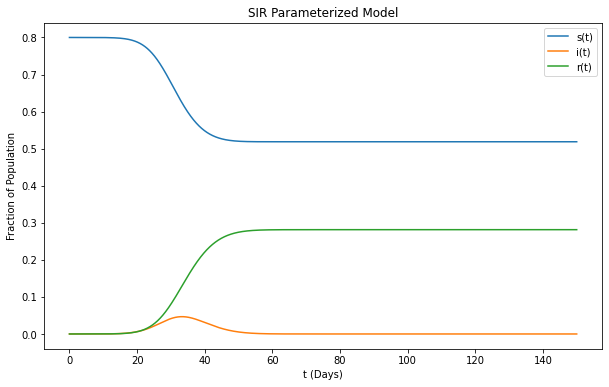

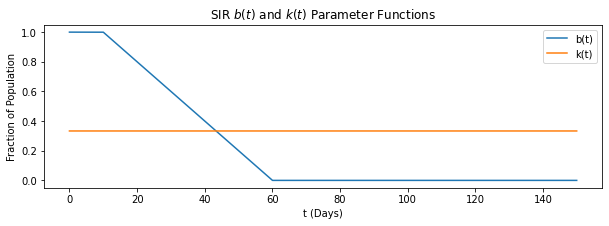

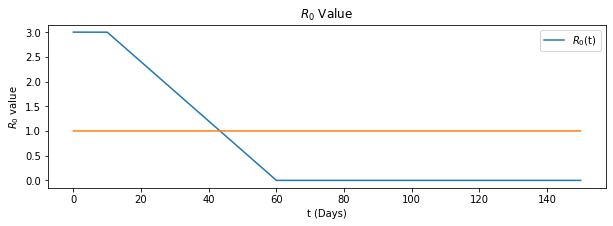

Outcome (t_f = 150.0 days)
Fraction of uninfected individuals, s(t_f): 0.5186
Fraction of recovered individuals, r(t_f): 0.2814


In [3]:
# model parameter functions (these must return values on [0,1]):
b_t = lambda t : min(1., max(0., (10-t)/50 + 1. ))
k_t = lambda t : 1./3.

# initial conditions:
s_0 = 0.8
i_0 = 1.25e-6
r_0 = 0

# time interval of integration
t = np.linspace(0, 150, 5000)

# integrate system (scipy uses RK4 integration here):
y_0 = np.array([s_0, i_0, r_0])
y = odeint(SIR_parameterized_RHS, y_0, t, args=(b_t,k_t))

# calculate parameter function values:
b_data = np.array([ b_t(i) for i in t ])
k_data = np.array([ k_t(i) for i in t ])

s_data, i_data, r_data = y[:,0], y[:,1], y[:,2]

# plot results:
plt.figure(figsize=(10,6))
plt.title(f'SIR Parameterized Model')
plt.plot(t, s_data, label='s(t)')
plt.plot(t, i_data, label='i(t)')
plt.plot(t, r_data, label='r(t)')
plt.xlabel('t (Days)')
plt.ylabel('Fraction of Population')
plt.legend()
plt.show()

plt.figure(figsize=(10,3))
plt.title(r'SIR $b(t)$ and $k(t)$ Parameter Functions')
plt.plot(t, b_data, label='b(t)')
plt.plot(t, k_data, label='k(t)')
plt.xlabel('t (Days)')
plt.ylabel('Fraction of Population')
plt.legend()
plt.show()

plt.figure(figsize=(10,3))
plt.title(r'$R_0$ Value')
plt.plot(t, (b_data/k_data), label=r'$R_0$(t)')
plt.plot(t, [1.0]*len(t))
plt.xlabel('t (Days)')
plt.ylabel(r'$R_0$ value')
plt.legend()
plt.show()

# print outcome statistics:
print(f'Outcome (t_f = {t[-1]} days)')
print(f'Fraction of uninfected individuals, s(t_f): {s_data[-1]:.4f}')
print(f'Fraction of recovered individuals, r(t_f): {r_data[-1]:.4f}')